In [9]:
import astropy.units as u
from tdsat_telescope import load_telescope_parameters
from tdsat_sensitivity import src_rate, bgd_sky_qe_rate, bgd_electronics, calc_exposure
from tdsat_neff import get_neff
from bbmag import bb_abmag_fluence
import numpy as np
from matplotlib import pyplot as plt

from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [14]:
from bbmag import bb_abmag_fluence

In [24]:
siglimit = 10. # sigma
read_noise = 3.*(2**0.5) # Read noise for two frames

# Target value
AB = 22*u.ABmag

point_drift = 1*u.arcsec # To be added to the PSF in quadrature
point_jitter = 5*u.arcsec
# Define bands
td1_band = [193, 233]*u.nm


# Transmission efficiency
trans_eff = (0.975)**8 # from Jim. 

print('Transmission efficiency: {}'.format(trans_eff))

# Load telescope info
config=11
diameter, qe, psf_size, pixel_size, efficiency = load_telescope_parameters(config)
area = 4 * np.pi * (diameter*0.5)**2


# Add in fuzz...
psf_size = (psf_size**2 + point_drift**2 + point_jitter**2)**0.5


print('Effective PSF size {}'.format(psf_size))
# Get the number of effective background pixels
neff = get_neff(psf_size, pixel_size)
print('Number of effective bgd pixels: {}'.format(neff))
print()


Transmission efficiency: 0.8166518036622619
Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Efficiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2
Effective PSF size 6.6623527375845235 arcsec
Number of effective bgd pixels: 2.990374488245114



Sky background rate per pixel band1: 0.043301937298254545 1 / s
Sky background rate per pixel band2: 0.4792754576408422 1 / s


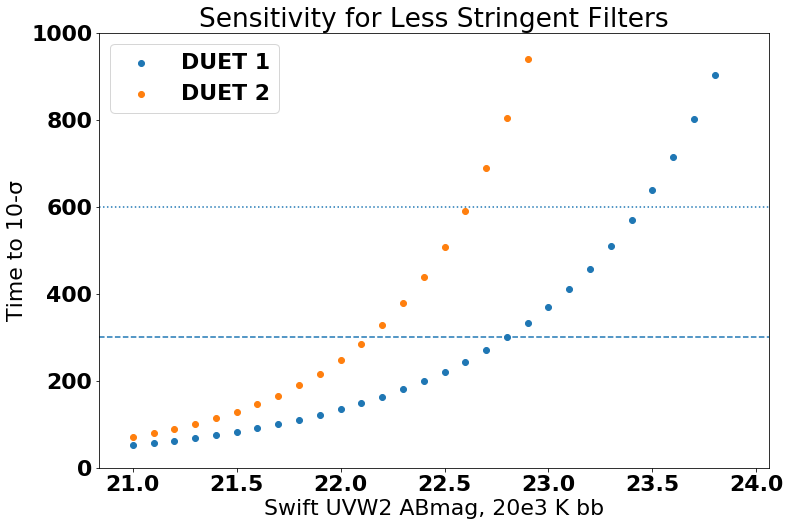

In [115]:
light=True
siglimit=10


exp1 = []
exp2 = []
sm = []
# Compute sky background
bgd_ph_rate = bgd_sky_qe_rate(med_zodi=True,
                              diameter=diameter,
                              band=td1_band,
                              pixel_size=pixel_size, real_red=True, light=light)
bgd_band1 = trans_eff * efficiency * bgd_ph_rate
print('Sky background rate per pixel band1: {}'.format(bgd_band1))


bgd_ph_rate = bgd_sky_qe_rate(med_zodi=True,
                              diameter=diameter,
                              band=td1_band,qe_band=2,
                              pixel_size=pixel_size, real_red=True, light=light)
bgd_band2 = trans_eff  * efficiency * bgd_ph_rate
print('Sky background rate per pixel band2: {}'.format(bgd_band2))

for swiftmag in np.arange(21, 24, 0.1):
    band1_fluence, band2_fluence = bb_abmag_fluence(swiftmag=swiftmag*u.ABmag, bbtemo=20e3*u.K, light=light)
    band1_rate = trans_eff  * efficiency * area * band1_fluence
    band2_rate = trans_eff * efficiency * area * band2_fluence




    exposure1 = calc_exposure(siglimit, band1_rate, bgd_band1,read_noise, neff)
    exposure2 = calc_exposure(siglimit, band2_rate, bgd_band2,read_noise, neff)

    exp1 = np.append(exp1, exposure1)
    exp2 = np.append(exp2, exposure2)
    sm = np.append(sm, swiftmag)
plt.figure(figsize=[12, 8])
plt.scatter(sm, exp1, label='DUET 1')
plt.scatter(sm, exp2, label='DUET 2')

plt.ylim([0, 1000])
plt.axhline(300, linestyle = '--')

plt.axhline(600, linestyle = ':')

plt.ylabel('Time to {}-σ'.format(siglimit))
plt.xlabel('Swift UVW2 ABmag, 20e3 K bb')
plt.title('Sensitivity for Less Stringent Filters')
plt.legend()
plt.show()

Sky background rate per pixel band1: 0.005343951525252733 1 / s
Sky background rate per pixel band2: 0.1668555474489293 1 / s


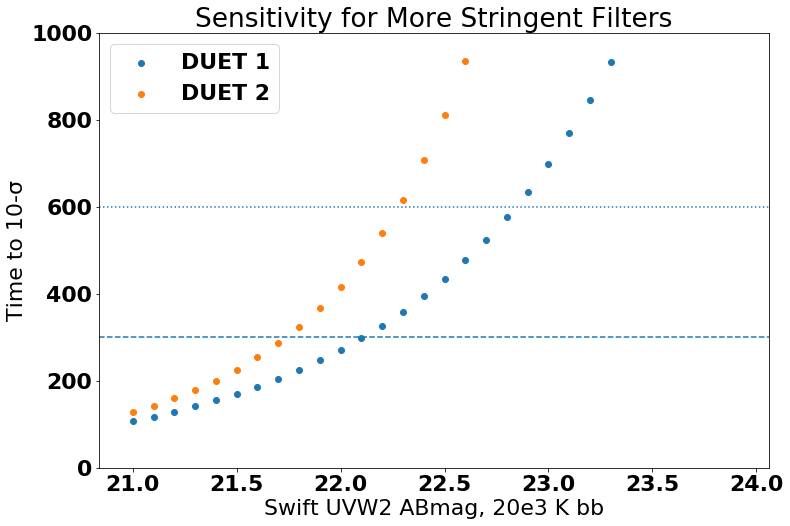

In [116]:
light=False
siglimit=10


exp1 = []
exp2 = []
sm = []
# Compute sky background
bgd_ph_rate = bgd_sky_qe_rate(med_zodi=True,
                              diameter=diameter,
                              band=td1_band,
                              pixel_size=pixel_size, real_red=True, light=light)
bgd_band1 = trans_eff * efficiency * bgd_ph_rate
print('Sky background rate per pixel band1: {}'.format(bgd_band1))


bgd_ph_rate = bgd_sky_qe_rate(med_zodi=True,
                              diameter=diameter,
                              band=td1_band,qe_band=2,
                              pixel_size=pixel_size, real_red=True, light=light)
bgd_band2 = trans_eff  * efficiency * bgd_ph_rate
print('Sky background rate per pixel band2: {}'.format(bgd_band2))

for swiftmag in np.arange(21, 24, 0.1):
    band1_fluence, band2_fluence = bb_abmag_fluence(swiftmag=swiftmag*u.ABmag, bbtemo=20e3*u.K, light=light)
    band1_rate = trans_eff  * efficiency * area * band1_fluence
    band2_rate = trans_eff * efficiency * area * band2_fluence

    exposure1 = calc_exposure(siglimit, band1_rate, bgd_band1,read_noise, neff)
    exposure2 = calc_exposure(siglimit, band2_rate, bgd_band2,read_noise, neff)

    exp1 = np.append(exp1, exposure1)
    exp2 = np.append(exp2, exposure2)
    sm = np.append(sm, swiftmag)
plt.figure(figsize=[12, 8])
plt.scatter(sm, exp1, label='DUET 1')
plt.scatter(sm, exp2, label='DUET 2')

plt.ylim([0, 1000])
plt.axhline(300, linestyle = '--')

plt.axhline(600, linestyle = ':')

plt.ylabel('Time to {}-σ'.format(siglimit))
plt.xlabel('Swift UVW2 ABmag, 20e3 K bb')
plt.title('Sensitivity for More Stringent Filters')
plt.legend()
plt.show()

Sky background rate per pixel band1: 0.043301937298254545 1 / s
Sky background rate per pixel band2: 0.4792754576408422 1 / s


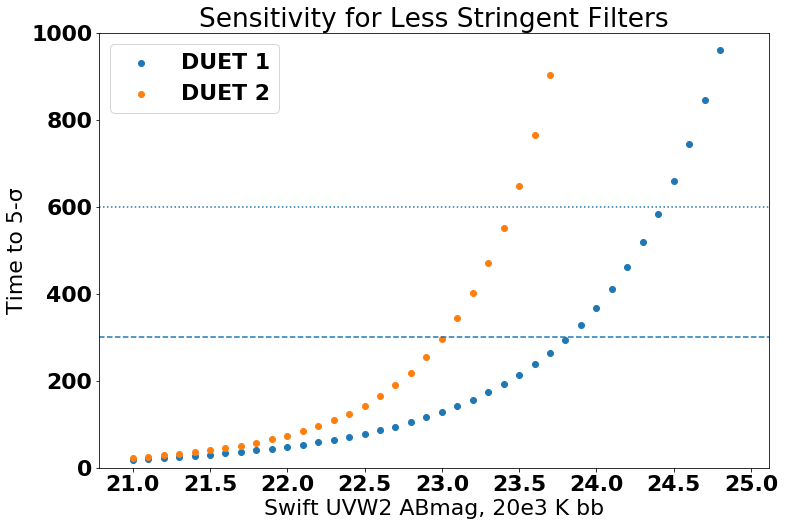

In [118]:
light=True
siglimit=5


exp1 = []
exp2 = []
sm = []
# Compute sky background
bgd_ph_rate = bgd_sky_qe_rate(med_zodi=True,
                              diameter=diameter,
                              band=td1_band,
                              pixel_size=pixel_size, real_red=True, light=light)
bgd_band1 = trans_eff * efficiency * bgd_ph_rate
print('Sky background rate per pixel band1: {}'.format(bgd_band1))


bgd_ph_rate = bgd_sky_qe_rate(med_zodi=True,
                              diameter=diameter,
                              band=td1_band,qe_band=2,
                              pixel_size=pixel_size, real_red=True, light=light)
bgd_band2 = trans_eff  * efficiency * bgd_ph_rate
print('Sky background rate per pixel band2: {}'.format(bgd_band2))

for swiftmag in np.arange(21, 25, 0.1):
    band1_fluence, band2_fluence = bb_abmag_fluence(swiftmag=swiftmag*u.ABmag, bbtemo=20e3*u.K, light=light)
    band1_rate = trans_eff  * efficiency * area * band1_fluence
    band2_rate = trans_eff * efficiency * area * band2_fluence




    exposure1 = calc_exposure(siglimit, band1_rate, bgd_band1,read_noise, neff)
    exposure2 = calc_exposure(siglimit, band2_rate, bgd_band2,read_noise, neff)

    exp1 = np.append(exp1, exposure1)
    exp2 = np.append(exp2, exposure2)
    sm = np.append(sm, swiftmag)
plt.figure(figsize=[12, 8])
plt.scatter(sm, exp1, label='DUET 1')
plt.scatter(sm, exp2, label='DUET 2')

plt.ylim([0, 1000])
plt.axhline(300, linestyle = '--')

plt.axhline(600, linestyle = ':')

plt.ylabel('Time to {}-σ'.format(siglimit))
plt.xlabel('Swift UVW2 ABmag, 20e3 K bb')
plt.title('Sensitivity for Less Stringent Filters')
plt.legend()
plt.show()